# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [14]:
import numpy as np

### Simulation du lancé de dé

In [15]:
def Roll():
    return int(np.random.choice(range(1,7),1)) 

In [16]:
Roll()

5

### Compléter le code et commenter

In [17]:
A=0 #prison
NA=0
S=10
temp=Roll()
NA+=1
while temp !=6:
    temp=Roll()
    NA+=1
    print(NA,temp)
A=1
print('sotrie de la prison apres {} coups'.format(NA))
while A<S:
    temp=Roll()
    if temp+A<S:
        NA=+1
        A+=temp
        print(NA,temp,A)
    elif temp+A>S:
        NA+=1
        print(NA,temp,A)
    else:
        A=S
        NA+=1
        print(NA,temp,A)
        
        

2 1
3 3
4 6
sotrie de la prison apres 4 coups
1 2 3
1 6 9
2 1 10


### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [18]:
def sim(S):
    A=0 #prison
    NA=0#compteur
    temp=Roll()
    NA+=1
    while temp !=6:
        temp=Roll()
        NA+=1
    A=1
    while A<S:
        temp=Roll()
        if temp+A<S:
            NA=+1
            A+=temp
        elif temp+A>S:
            NA+=1
        else:
            A=S
            NA+=1
      
    return NA
        
   
    

In [19]:
sim(20)

4

In [20]:
#stimulation 10000 fois n=30
L=[sim(30) for i in range (10000)]
Moy=sum(L)/10000
print('estimation de la moyenne de x_30{}'.format(Moy))

estimation de la moyenne de x_305.1728


### Simulation de $10^5$  scénario 

In [21]:
x=list(range(10,20))
x
y=[sum([sim(u) for i in range (10000)])/100000 for u in x ]

In [22]:
import matplotlib.pyplot as plt

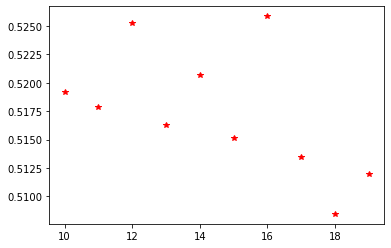

In [23]:
plt.plot(x,y,'*r')
plt.show()

In [24]:
#pip install scipy

In [25]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [26]:
slope

-0.0010140606060606043

In [27]:
intercept


0.5321178787878786

In [28]:
yy=[slope *u +intercept for u in x]

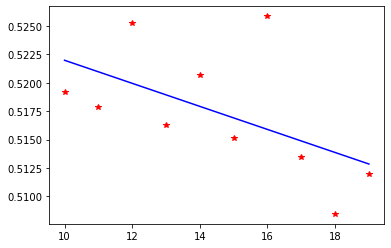

In [29]:
plt.plot(x,y,'*r',x,yy,'-b')